<a href="https://colab.research.google.com/github/SVGS-EVA4/Phase2/blob/master/S2-MobileNets_and_ShuffleNets/Final_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pip install torch==1.5.1+cu92 torchvision==0.6.1+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 604.8MB 31kB/s 
     |████████████████████████████████| 6.5MB 593kB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
!pip install torchsummary
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-nxhlqp8j
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-nxhlqp8j
     |████████████████████████████████| 952kB 7.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65819 sha256=8aea66e88f89b8744486ec5d9dd5e0b731b072204bba51aa3baace14f3bfcd21
  Stored in directory: /tmp/pip-ephem-wheel-cache-slb7aj1e/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!git clone https://github.com/SVGS-EVA4/Phase2
import sys
sys.path.append("Phase2/S2-MobileNets_and_ShuffleNets/Extras/Shilpa/code_files")

Cloning into 'Phase2'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 233 (delta 2), reused 0 (delta 0), pack-reused 220
Receiving objects: 100% (233/233), 37.30 MiB | 19.00 MiB/s, done.
Resolving deltas: 100% (75/75), done.


# Loading the dataset

In [ ]:
from custom_dataset import generate_dataset
from data_load import load
from display_images import show_train_data, show_misclassified_images, plot_misclassified_images
from train_test import Train_test
from save_model import save_model, save_model_cpu
from evaluate import evaluate_classwise_accuracy
from plots import plot_graphs, plot_train_test_lr

In [ ]:
# augmentations
import albumentations as A
import albumentations.pytorch as AP

mean = (0.53105756 , 0.58601165 , 0.61593276)

std = (0.28278487,  0.25762487 , 0.29407342)
	
train_transform = A.Compose(
    [ 
     
     A.Resize(224, 224, interpolation=1, always_apply=True, p=1),
     A.Flip(always_apply=False, p=0.5), 
     A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.1, rotate_limit=45, 
                        interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
     A.RandomContrast(limit=0.2, always_apply=False, p=0.5),
    #  A.ChannelShuffle(always_apply=False, p=0.5),
    #  A.GridDistortion(num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4,
    #                   value=None, mask_value=None, always_apply=False, p=0.5),
     A.Cutout(num_holes=4, max_h_size=32,max_w_size = 32,p=1,fill_value=0.5*255), 
     A.Normalize(mean=mean, std=std),
     AP.ToTensor()        
             ])
            
test_transform = A.Compose(
    [ 
     A.Resize(224, 224, interpolation=1, always_apply=True, p=1),
     A.Normalize(mean=mean, std=std),
     AP.ToTensor()        
             ])



In [ ]:
train_set,test_set = generate_dataset( train_transform=train_transform, test_transform=test_transform ,
                                      dataset_path='/content/gdrive/My Drive/e4p2/s2/dataset_padded.zip',
                                      labels_path='/content/gdrive/My Drive/e4p2/s2/labels_num.txt')                                        

Extracting all the files now...
Done!
Forming the dataset
Done!


In [ ]:
trainloader,testloader = load(train_set,test_set,batch_size=128)

# Display the images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


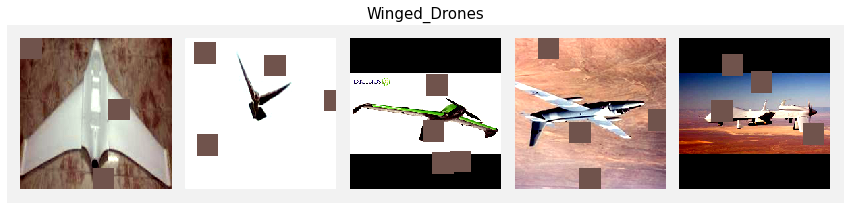

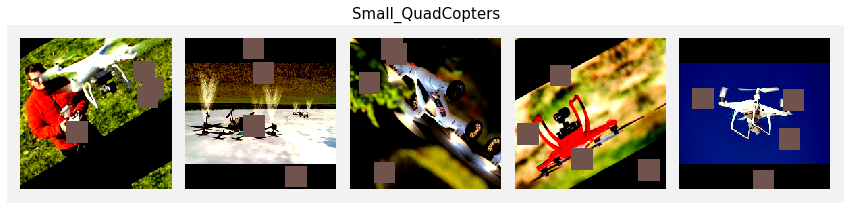

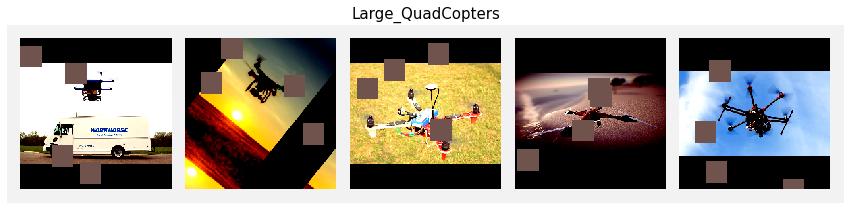

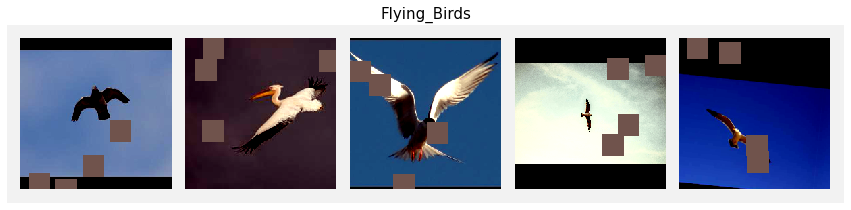

In [ ]:
classes = ['Winged_Drones', 'Small_QuadCopters', 'Large_QuadCopters', 'Flying_Birds' ]

show_train_data(trainloader,classes)

# Loading the model

In [ ]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)


cuda


In [ ]:
from torchsummary import summary

In [ ]:
model = torch.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=True).to(device)

Downloading: "https://github.com/pytorch/vision/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [ ]:
# # Freeze model weights
# for param in model.parameters():
#     param.requires_grad = False

In [ ]:
import torch.nn as nn

model.classifier[1] = nn.Sequential(
                      nn.Linear(1280, 256), 
                      nn.ReLU(), 
                      nn.Linear(256, 4),                   
                      ).cuda()

In [ ]:
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

# Training and testing

In [ ]:
import torch.optim as optim
import torch.optim.lr_scheduler

In [ ]:
EPOCHS = 20
l_rate = []
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9) 
criterion = nn.CrossEntropyLoss()
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5, last_epoch=-1)
train_test = Train_test()
best_test_acc = 0

from datetime import datetime
today = datetime.now()
path = f'/content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_{str(today)}.pt'

for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    l_rate.append(optimizer.param_groups[0]['lr'] )
    train_acc,train_acc_epoch_end,train_losses,train_loss_epoch_end,test_losses,test_acc = train_test.train_and_test(model, device, trainloader,testloader, optimizer, criterion, epoch)
    if test_acc[-1] > best_test_acc:     
      save_model(epoch+1 , model.state_dict(), optimizer, test_losses,test_acc,path)
      best_test_acc = test_acc[-1]
    # scheduler.step()

  0%|          | 0/117 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.001


Loss=0.7336871027946472 Batch_id=116 Accuracy=57.01: 100%|██████████| 117/117 [05:18<00:00,  2.72s/it]



Test set: Average loss: 0.0050, Accuracy: 4841/6401 (75.63%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt


  0%|          | 0/117 [00:00<?, ?it/s]

EPOCH: 2 LR: 0.001


Loss=0.5905945897102356 Batch_id=116 Accuracy=77.46: 100%|██████████| 117/117 [05:16<00:00,  2.71s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 5210/6401 (81.39%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 3 LR: 0.001


Loss=0.4307861328125 Batch_id=116 Accuracy=80.76: 100%|██████████| 117/117 [05:18<00:00,  2.72s/it]



Test set: Average loss: 0.0033, Accuracy: 5325/6401 (83.19%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt


  0%|          | 0/117 [00:00<?, ?it/s]

EPOCH: 4 LR: 0.001


Loss=0.38850635290145874 Batch_id=116 Accuracy=82.74: 100%|██████████| 117/117 [05:18<00:00,  2.73s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 5368/6401 (83.86%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 5 LR: 0.001


Loss=0.41881027817726135 Batch_id=116 Accuracy=83.07: 100%|██████████| 117/117 [05:17<00:00,  2.71s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 5445/6401 (85.06%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 6 LR: 0.001


Loss=0.4067530632019043 Batch_id=116 Accuracy=83.89: 100%|██████████| 117/117 [05:16<00:00,  2.71s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 5446/6401 (85.08%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 7 LR: 0.001


Loss=0.3225467801094055 Batch_id=116 Accuracy=84.67: 100%|██████████| 117/117 [05:18<00:00,  2.72s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 5459/6401 (85.28%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 8 LR: 0.001


Loss=0.4003341495990753 Batch_id=116 Accuracy=85.09: 100%|██████████| 117/117 [05:17<00:00,  2.71s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5497/6401 (85.88%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 9 LR: 0.001


Loss=0.47854501008987427 Batch_id=116 Accuracy=85.36: 100%|██████████| 117/117 [05:18<00:00,  2.72s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5524/6401 (86.30%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 10 LR: 0.001


Loss=0.37333279848098755 Batch_id=116 Accuracy=86.03: 100%|██████████| 117/117 [05:20<00:00,  2.74s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5570/6401 (87.02%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 11 LR: 0.001


Loss=0.4494125545024872 Batch_id=116 Accuracy=86.73: 100%|██████████| 117/117 [05:19<00:00,  2.73s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5584/6401 (87.24%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 12 LR: 0.001


Loss=0.2874765396118164 Batch_id=116 Accuracy=86.58: 100%|██████████| 117/117 [05:19<00:00,  2.73s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5584/6401 (87.24%)

EPOCH: 13 LR: 0.001


Loss=0.36263808608055115 Batch_id=116 Accuracy=87.22: 100%|██████████| 117/117 [05:19<00:00,  2.73s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5624/6401 (87.86%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 14 LR: 0.001


Loss=0.30558592081069946 Batch_id=116 Accuracy=87.26: 100%|██████████| 117/117 [05:18<00:00,  2.72s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5613/6401 (87.69%)

EPOCH: 15 LR: 0.001


Loss=0.3147772252559662 Batch_id=116 Accuracy=87.83: 100%|██████████| 117/117 [05:19<00:00,  2.73s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5642/6401 (88.14%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 16 LR: 0.001


Loss=0.375997930765152 Batch_id=116 Accuracy=87.75: 100%|██████████| 117/117 [05:17<00:00,  2.72s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5605/6401 (87.56%)

EPOCH: 17 LR: 0.001


Loss=0.26259130239486694 Batch_id=116 Accuracy=88.42: 100%|██████████| 117/117 [05:19<00:00,  2.73s/it]



Test set: Average loss: 0.0025, Accuracy: 5656/6401 (88.36%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt


  0%|          | 0/117 [00:00<?, ?it/s]

EPOCH: 18 LR: 0.001


Loss=0.3106946349143982 Batch_id=116 Accuracy=89.04: 100%|██████████| 117/117 [05:21<00:00,  2.75s/it]
  0%|          | 0/117 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 5679/6401 (88.72%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt
EPOCH: 19 LR: 0.001


Loss=0.438920259475708 Batch_id=116 Accuracy=89.05: 100%|██████████| 117/117 [05:23<00:00,  2.76s/it]



Test set: Average loss: 0.0023, Accuracy: 5687/6401 (88.85%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt


  0%|          | 0/117 [00:00<?, ?it/s]

EPOCH: 20 LR: 0.001


Loss=0.3691052794456482 Batch_id=116 Accuracy=89.17: 100%|██████████| 117/117 [05:20<00:00,  2.74s/it]



Test set: Average loss: 0.0023, Accuracy: 5715/6401 (89.28%)

Test Accuracy Improved! Saving Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt


In [ ]:
path = f'/content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_best_cpu2.pt'
save_model_cpu(model,path)

Saved Model to /content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_best_cpu2.pt


# Plots

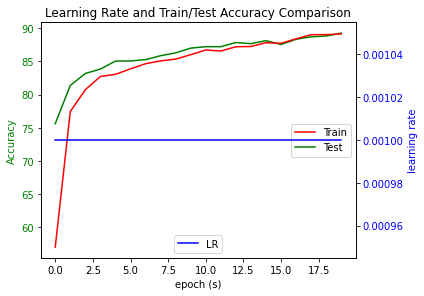

In [ ]:
plot_train_test_lr(test = test_acc, train = train_acc_epoch_end,l_rate = l_rate,Type='Accuracy')

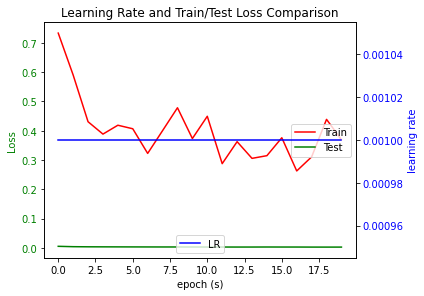

In [ ]:
plot_train_test_lr(test = test_losses, train = train_loss_epoch_end,l_rate = l_rate,Type='Loss')

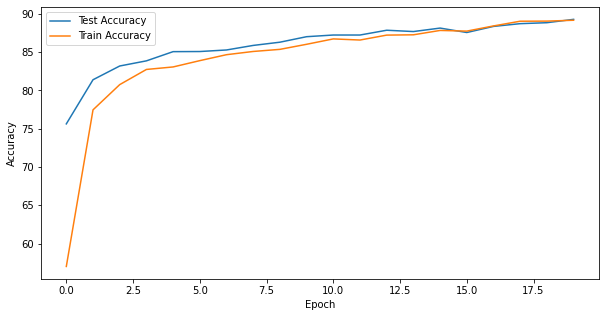

In [ ]:
plot_graphs(stats=[ test_acc, train_acc_epoch_end ], labels=['Test Accuracy', 'Train Accuracy'],xlabel='Epoch',ylabel='Accuracy')

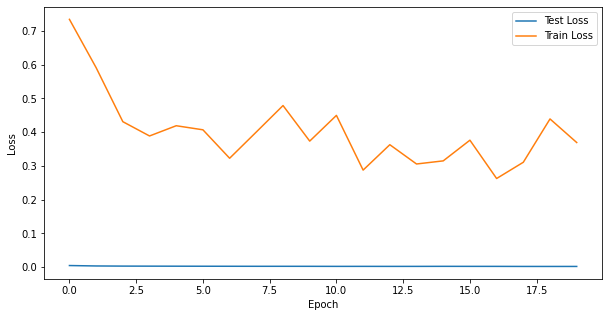

In [ ]:
plot_graphs(stats=[ test_losses, train_loss_epoch_end], labels=['Test Loss', 'Train Loss'],xlabel='Epoch',ylabel='Loss')

# Model Evaluation

In [ ]:
classes = ['Winged_Drones', 'Small_QuadCopters', 'Large_QuadCopters', 'Flying_Birds' ]
# model.to('cuda')
evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of Winged_Drones : 90.29714978775016 , Correctly Classified: 1489.0, Misclassified: 160.0
Accuracy of Small_QuadCopters : 76.33079847908745 , Correctly Classified: 803.0, Misclassified: 249.0
Accuracy of Large_QuadCopters : 80.0 , Correctly Classified: 1004.0, Misclassified: 251.0
Accuracy of Flying_Birds : 98.93617021276596 , Correctly Classified: 2418.0, Misclassified: 26.0


In [ ]:
import torch.optim as optim
import torch.optim.lr_scheduler
optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9) 
criterion = nn.CrossEntropyLoss()
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5, last_epoch=-1)

checkpoint = torch.load('/content/gdrive/My Drive/e4p2/s2/e4p2_s2_model_2020-08-08 19:20:28.605934.pt')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

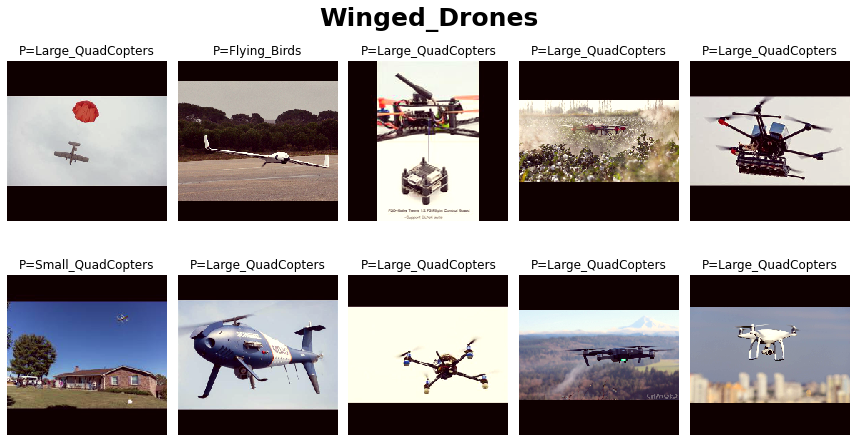

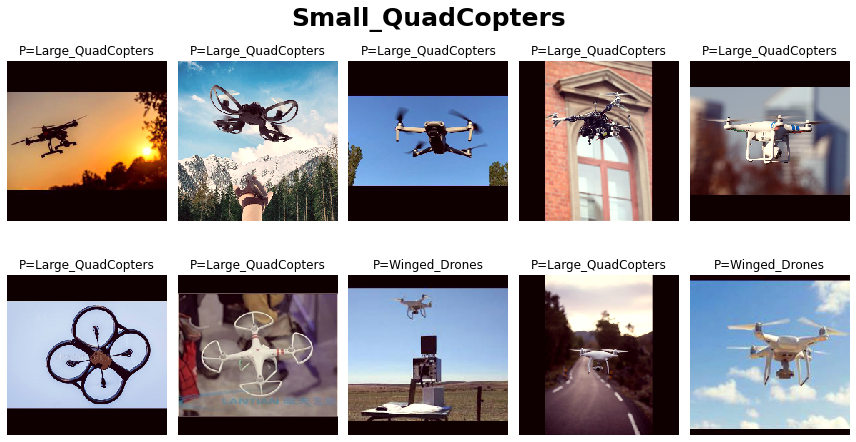

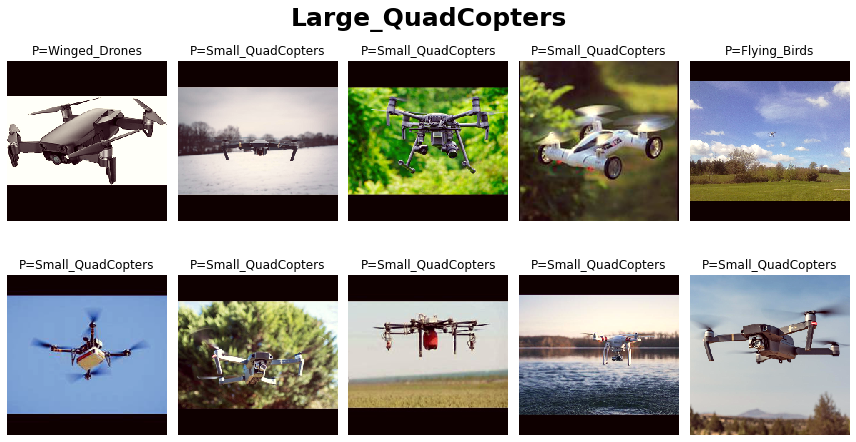

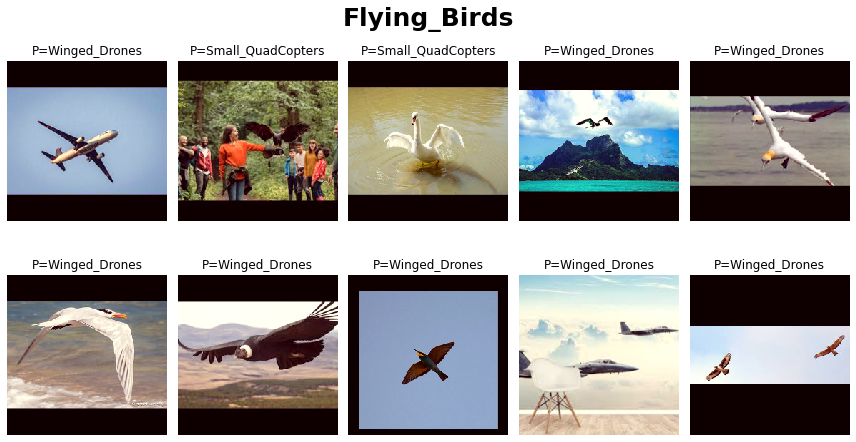

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import warnings

classes = ['Winged_Drones', 'Small_QuadCopters', 'Large_QuadCopters', 'Flying_Birds' ]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(4):
      misclassified_images = show_misclassified_images(model, device, testloader, classes,number = 10, class_no = i)
      plot_misclassified_images(misclassified_images, classes, Figsize = (12,15),number = 10, class_no = i)